Import Libraries

In [26]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
import sklearn.metrics as metric
%matplotlib inline

Dataset

In [27]:
col_names = ['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class']
   
    
data1 = pd.read_csv("bill_authen.csv", header=None, names=col_names)

data1.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,-1
1,4.54590,8.1674,-2.4586,-1.46210,-1
2,3.86600,2.6383,1.9242,0.10645,-1
3,3.45660,9.5228,-4.0112,-3.59440,-1
4,0.32924,4.4552,4.5718,-0.98880,-1


X_training and y_training

In [28]:
X1 = data1['Variance']
X2 = data1['Skewness']

X_training = np.array(list(zip(X1,X2)))
X_training

array([[  3.6216  ,   8.6661  ],
       [  4.5459  ,   8.1674  ],
       [  3.866   ,   2.6383  ],
       [  3.4566  ,   9.5228  ],
       [  0.32924 ,   4.4552  ],
       [  4.3684  ,   9.6718  ],
       [  3.5912  ,   3.0129  ],
       [  2.0922  ,   6.81    ],
       [  3.2032  ,   5.7588  ],
       [  1.5356  ,   9.1772  ],
       [  1.2247  ,   8.7779  ],
       [  3.9899  ,   2.7066  ],
       [  1.8993  ,   7.6625  ],
       [ -1.5768  ,  10.843   ],
       [  3.404   ,   8.7261  ],
       [  4.6765  ,   3.3895  ],
       [  2.6719  ,   3.0646  ],
       [  0.80355 ,   2.8473  ],
       [  1.4479  ,   4.8794  ],
       [ -1.3971  ,   3.3191  ],
       [  0.39012 ,   0.14279 ],
       [ -1.6677  ,   7.1535  ],
       [ -3.8483  ,  12.8047  ],
       [ -3.5681  ,   8.213   ],
       [ -2.2804  ,   0.30626 ],
       [ -1.7582  ,   2.7397  ],
       [ -0.89409 ,   3.1991  ],
       [  0.3434  ,   0.12415 ],
       [ -0.9854  ,   6.661   ],
       [ -2.4115  ,   9.1359  ],
       [ -

In [29]:
y_training = data1['Class']
y_training

0    -1
1    -1
2    -1
3    -1
4    -1
5    -1
6    -1
7    -1
8    -1
9    -1
10   -1
11   -1
12   -1
13   -1
14   -1
15   -1
16   -1
17   -1
18   -1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
Name: Class, dtype: int64

In [30]:
target_names = ['-1', '+1']
target_names

['-1', '+1']

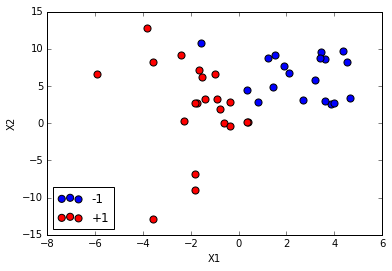

In [31]:
xx = y_training[y_training < 0].index
yy = y_training[y_training > 0].index

plt.scatter(X_training[xx, 0], X_training[xx, 1], c = 'b', s = 50)
plt.scatter(X_training[yy, 0], X_training[yy, 1], c = 'r', s = 50)
plt.legend(target_names, loc = 3)
plt.xlabel('X1')
plt.ylabel('X2')

In [32]:
X1_min = math.floor(min(X_training[:, 0])) - 1
X1_max = math.ceil(max(X_training[:, 0])) + 1
X2_min = math.floor(min(X_training[:, 1])) - 1
X2_max = math.ceil(max(X_training[:, 1])) + 1
[X1_min, X1_max, X2_min, X2_max]

[-7, 6, -14, 14]

Support Vector Machine training

In [33]:
svc = svm.SVC(kernel='linear',C=0.0095).fit(X_training,y_training)

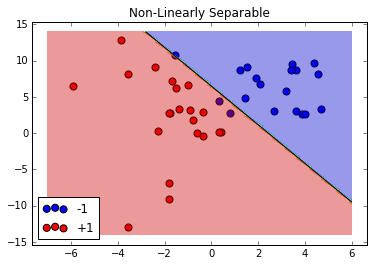

In [34]:
xx = y_training[y_training < 0].index
yy = y_training[y_training > 0].index

plt.scatter(X_training[xx, 0], X_training[xx, 1], c = 'b', s = 50)
plt.scatter(X_training[yy, 0], X_training[yy, 1], c = 'r', s = 50)

plt.legend(target_names, loc = 3)

X, Y = np.mgrid[X1_min:X1_max:100j, X2_min:X2_max:100j]
Z = svc.decision_function(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)

plt.contourf(X, Y, Z > 0, alpha = 0.4)
plt.contour(X,Y,Z,colors=['k'], linestyles=['-'],levels=[0])
plt.title('Non-Linearly Separable')



Linear Kernel with Regularization

1.0

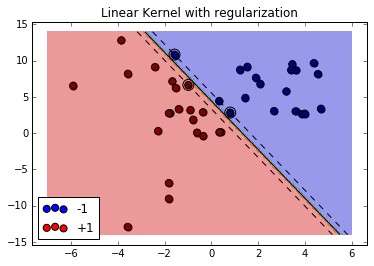

In [35]:
svc = svm.SVC(kernel = 'linear', C = 100).fit(X_training, y_training)

xx = y_training[y_training < 0].index
yy = y_training[y_training > 0].index
plt.scatter(X_training[xx, 0], X_training[xx, 1], c = 'b', s = 50)
plt.scatter(X_training[yy, 0], X_training[yy, 1], c = 'r', s = 50)
plt.legend(target_names, loc = 3)

X, Y = np.mgrid[X1_min:X1_max:100j, X2_min:X2_max:100j]
Z = svc.decision_function(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)

plt.contourf(X, Y, Z > 0, alpha = 0.4)
plt.contour(X,Y,Z,colors=['k','k','k'], linestyles=['--','-','--'],levels=[-1,0,1])
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s =120, facecolors = 'none' )
plt.scatter(X_training[:, 0], X_training[:, 1], c = y_training, s = 50, alpha = 0.95)

plt.title('Linear Kernel with regularization')

svc.score(X_training,y_training)